### 导入所需要的库

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

### 创建需要拟合的数据集

In [3]:
rnd = np.random.RandomState(42)  # 设置随机数种子
X = rnd.uniform(-3, 3, size=100)  # random.uniform，从输入的任意两个整数中取出size个随机数

In [4]:
X  # 作为横坐标

array([-0.75275929,  2.70428584,  1.39196365,  0.59195091, -2.06388816,
       -2.06403288, -2.65149833,  2.19705687,  0.60669007,  1.24843547,
       -2.87649303,  2.81945911,  1.99465584, -1.72596534, -1.9090502 ,
       -1.89957294, -1.17454654,  0.14853859, -0.40832989, -1.25262516,
        0.67111737, -2.16303684, -1.24713211, -0.80182894, -0.26358009,
        1.71105577, -1.80195731,  0.08540663,  0.55448741, -2.72129752,
        0.64526911, -1.97685526, -2.60969044,  2.69331322,  2.7937922 ,
        1.85038409, -1.17231738, -2.41396732,  1.10539816, -0.35908504,
       -2.26777059, -0.02893854, -2.79366887,  2.45592241, -1.44732011,
        0.97513371, -1.12973354,  0.12040813,  0.28026168, -1.89087327,
        2.81750777,  1.65079694,  2.63699365,  2.3689641 ,  0.58739987,
        2.53124541, -2.46904499, -1.82410283, -2.72863627, -1.04801802,
       -0.66793626, -1.37190581,  1.97242505, -0.85948004, -1.31439294,
        0.2561765 , -2.15445465,  1.81318188, -2.55269614,  2.92

In [5]:
# 生成y的思路：先使用NumPy中的函数生成一个sin函数图像，然后再人为添加噪音
y = np.sin(X) + rnd.normal(size=len(X)) / 3  # random.normal，生成size个服从正态分布的随机数

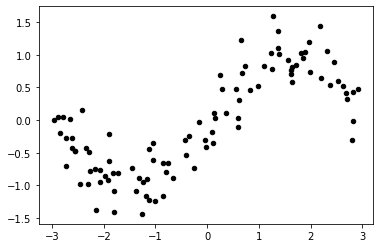

In [6]:
# 使用散点图观察建立的数据集是什么样子
plt.scatter(X, y, marker='o', c='k', s=20)
plt.show()

In [8]:
# 为后续建模做准备：sklearn只接受二维以上数组作为特征矩阵的输入
X.shape

(100,)

In [9]:
X = X.reshape(-1, 1)
X.shape

(100, 1)

### 使用原始数据进行建模

In [10]:
LinearR = LinearRegression().fit(X, y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y)

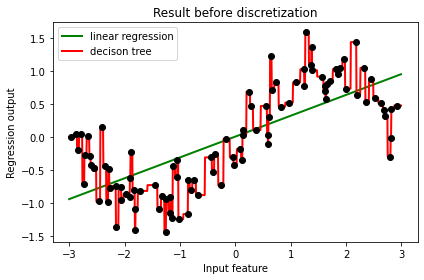

In [14]:
# 放置画布
fig, ax1 = plt.subplots(1)

# 创建测试数据：一系列分布在横坐标上的点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
# 将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2,
         color='green', label='linear regression')
ax1.plot(line, TreeR.predict(line), linewidth=2,
         color='red', label='decison tree')
# 将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')
# 其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()

# 从这个图像来看，可以得出什么结果？

## 使用分箱处理非线性问题

### 导入所需要的库

In [15]:
from sklearn.preprocessing import KBinsDiscretizer

### 分箱及分箱的相关问题

In [17]:
# 将数据分箱
enc = KBinsDiscretizer(n_bins=10,  # 分几类？
                       encode='onehot'  # ordinal
                       )
X_binned = enc.fit_transform(X)
# encode模式"onehot"：使用做哑变量方式做离散化
# 之后返回一个稀疏矩阵(m,n_bins)，每一列是一个分好的类别
# 对每一个样本而言，它包含的分类（箱子）中它表示为1，其余分类中它表示为0
X.shape

(100, 1)

In [18]:
X_binned

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [19]:
# 使用pandas打开稀疏矩阵
import pandas as pd
pd.DataFrame(X_binned.toarray()).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 我们将使用分箱后的数据来训练模型，在sklearn中，测试集和训练集的结构必须保持一致，否则报错
LinearR_ = LinearRegression().fit(X_binned, y)

In [27]:
LinearR_.predict(line)  # line作为测试集报错

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 1)

In [22]:
line_.shape  # 测试

(1000, 10)

In [23]:
X_binned.shape  # 训练

(100, 10)

In [24]:
# 因此我们需要创建分箱后的测试集：按照已经建好的分箱模型将line分箱
line_binned = enc.transform(line)
line_binned.shape  # 分箱后的数据是无法进行绘图的

(1000, 10)

In [25]:
line_binned

<1000x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [26]:
LinearR_.predict(line_binned).shape

(1000,)

In [29]:
enc.bin_edges_[0]  # 分出的箱子的上限和下限

array([-2.9668673 , -2.55299973, -2.0639171 , -1.3945301 , -1.02797432,
       -0.21514527,  0.44239288,  1.14612193,  1.63693428,  2.32784522,
        2.92132162])

### 使用分箱数据进行建模和绘图

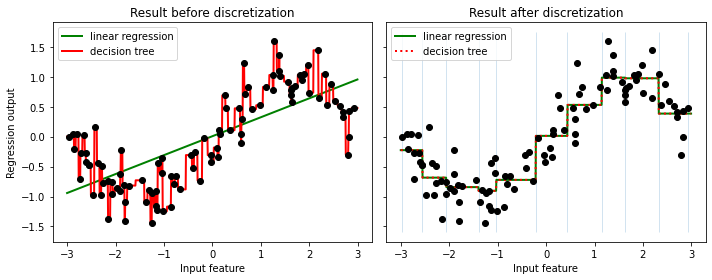

In [30]:
# 准备数据
enc = KBinsDiscretizer(n_bins=10, encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)

# 将两张图像绘制在一起，布置画布
fig, (ax1, ax2) = plt.subplots(ncols=2,
                               sharey=True,  # 让两张图共享y轴上的刻度
                               figsize=(10, 4))
# 在图1中布置在原始数据上建模的结果
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',
         label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',
         label="decision tree")
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

# 使用分箱数据进行建模
LinearR_ = LinearRegression().fit(X_binned, y)
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)
# 进行预测，在图2中布置在分箱数据上进行预测的结果
ax2.plot(line,  # 横坐标
         LinearR_.predict(line_binned),  # 分箱后的特征矩阵的结果
         linewidth=2,
         color='green',
         linestyle='-',
         label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')

# 绘制和箱宽一致的竖线
ax2.vlines(enc.bin_edges_[0],  # x轴
           *plt.gca().get_ylim(),  # y轴的上限和下限
           linewidth=1, alpha=.2)

# 将原始数据分布放置在图像上
ax2.plot(X[:, 0], y, 'o', c='k')
# 其他绘图设定
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

### 箱子数如何影响模型的结果

0.9590978882491229
0.9590978882491229


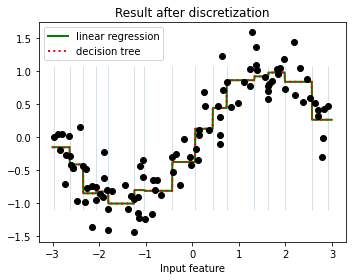

In [36]:
enc = KBinsDiscretizer(n_bins=15, encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)

fig, ax2 = plt.subplots(1, figsize=(5, 4))
LinearR_ = LinearRegression().fit(X_binned, y)
print(LinearR_.score(line_binned, np.sin(line)))
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)
print(TreeR_.score(line_binned, np.sin(line)))
ax2.plot(line,  # 横坐标
         LinearR_.predict(line_binned),  # 分箱后的特征矩阵的结果
         linewidth=2,
         color='green',
         linestyle='-',
         label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

### 如何选取最优的箱数

In [37]:
from sklearn.model_selection import cross_val_score as CVS
import numpy as np

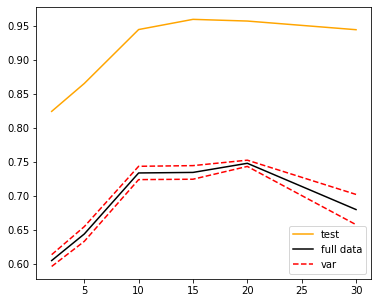

In [38]:
pred, score, var = [], [], []
binsrange = [2, 5, 10, 15, 20, 30]
for i in binsrange:
    # 实例化分箱类
    enc = KBinsDiscretizer(n_bins=i, encode="onehot")
    # 转换数据
    X_binned = enc.fit_transform(X)
    line_binned = enc.transform(line)
    # 建立模型
    LinearR_ = LinearRegression()
    # 全数据集上的交叉验证
    cvresult = CVS(LinearR_, X_binned, y, cv=5)
    score.append(cvresult.mean())
    var.append(cvresult.var())
    # 测试数据集上的打分结果
    pred.append(LinearR_.fit(X_binned, y).score(line_binned, np.sin(line)))
# 绘制图像
plt.figure(figsize=(6, 5))
plt.plot(binsrange, pred, c="orange", label="test")
plt.plot(binsrange, score, c="k", label="full data")
plt.plot(binsrange, score+np.array(var)*0.5,
         c="red", linestyle="--", label="var")
plt.plot(binsrange, score-np.array(var)*0.5, c="red", linestyle="--")
plt.legend()
plt.show()

## 多项式回归PolynomialFeatures

### 多项式对数据做了什么

In [39]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [40]:
# 如果原始数据是一维的
X = np.arange(1, 4).reshape(-1, 1)
X

array([[1],
       [2],
       [3]])

In [41]:
# 二次多项式，参数degree控制多项式的次方
poly = PolynomialFeatures(degree=2)

In [43]:
# 接口transform直接调用
X_ = poly.fit_transform(X)
X_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [44]:
X_.shape

(3, 3)

In [45]:
# 三次多项式
PolynomialFeatures(degree=3).fit_transform(X)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [46]:
# 三次多项式，不带与截距项相乘的x0
PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

In [47]:
# 为什么我们会希望不生成与截距相乘的x0呢？
# 对于多项式回归来说，我们已经为线性回归准备好了x0，但是线性回归并不知道
xxx = PolynomialFeatures(degree=3).fit_transform(X)
xxx.shape

(3, 4)

In [48]:
rnd = np.random.RandomState(42)  # 设置随机数种子
y = rnd.randn(3)
y

array([ 0.49671415, -0.1382643 ,  0.64768854])

In [49]:
# 生成了多少个系数？
LinearRegression().fit(xxx, y).coef_

array([ 3.08086889e-15, -3.51045297e-01, -6.06987134e-01,  2.19575463e-01])

In [50]:
# 查看截距
LinearRegression().fit(xxx, y).intercept_

1.2351711202036884

In [51]:
# 发现问题了吗？线性回归并没有把多项式生成的x0当作是截距项
# 所以我们可以选择：关闭多项式回归中的include_bias
# 也可以选择：关闭线性回归中的fit_intercept

# 生成了多少个系数？
LinearRegression(fit_intercept=False).fit(xxx, y).coef_

array([ 1.00596411,  0.06916756, -0.83619415,  0.25777663])

In [52]:
# 查看截距
LinearRegression(fit_intercept=False).fit(xxx, y).intercept_

0.0

In [53]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [54]:
# 尝试二次多项式
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [55]:
# 尝试三次多项式
PolynomialFeatures(degree=3).fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [56]:
PolynomialFeatures(degree=2, interaction_only=True).fit_transform(X)
# 对比之下，当interaction_only为True的时候，只生成交互项

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [57]:
# 更高维度的原始特征矩阵
X = np.arange(20).reshape(2, 10)
X

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [58]:
PolynomialFeatures(degree=2).fit_transform(X).shape

(2, 66)

In [59]:
PolynomialFeatures(degree=3).fit_transform(X).shape

(2, 286)

In [60]:
X_ = PolynomialFeatures(degree=20).fit_transform(X)
X_.shape

(2, 30045015)

### 多项式回归处理非线性问题

In [61]:
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression
import numpy as np

In [62]:
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
# 将X升维，准备好放入sklearn中
X = X.reshape(-1, 1)

# 创建测试数据，均匀分布在训练集X的取值范围内的一千个点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

In [63]:
# 原始特征矩阵的拟合结果
LinearR = LinearRegression().fit(X, y)
# 对训练数据的拟合
LinearR.score(X, y)

0.5361526059318595

In [64]:
# 对测试数据的拟合
LinearR.score(line, np.sin(line))

0.6800102369793312

In [65]:
# 多项式拟合，设定高次项
d = 5

# 进行高次项转换
poly = PF(degree=d)
X_ = poly.fit_transform(X)
line_ = poly.transform(line)

# 训练数据的拟合
LinearR_ = LinearRegression().fit(X_, y)
LinearR_.score(X_, y)

0.8561679370344799

In [66]:
# 测试数据的拟合
LinearR_.score(line_, np.sin(line))

0.9868904451787953

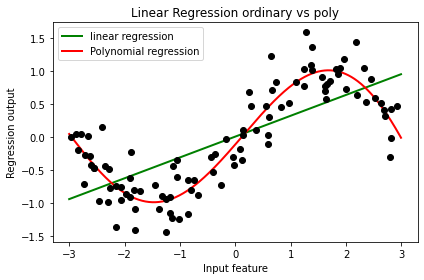

In [67]:
import matplotlib.pyplot as plt

d = 5
# 和上面展示一致的建模流程
LinearR = LinearRegression().fit(X, y)
X_ = PF(degree=d).fit_transform(X)
LinearR_ = LinearRegression().fit(X_, y)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_ = PF(degree=d).fit_transform(line)

# 放置画布
fig, ax1 = plt.subplots(1)

# 将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2,
         color='green', label="linear regression")
ax1.plot(line, LinearR_.predict(line_), linewidth=2,
         color='red', label="Polynomial regression")

# 将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')

# 其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Linear Regression ordinary vs poly")
plt.tight_layout()
plt.show()

# 来一起鼓掌，感叹多项式回归的神奇

# 随后可以试试看较低和较高的次方会发生什么变化
# d=2
# d=20

### 多项式回归的可解释性

In [68]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.arange(9).reshape(3, 3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [69]:
poly = PolynomialFeatures(degree=5).fit(X)
# 重要接口get_feature_names
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [70]:
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd

housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [71]:
X.columns = ["住户收入中位数", "房屋使用年代中位数", "平均房间数目",
             "平均卧室数目", "街区人口", "平均入住率", "街区的纬度", "街区的经度"]
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [76]:
poly = PolynomialFeatures(degree=4).fit(X, y)
poly.get_feature_names(X.columns)

['1',
 '住户收入中位数',
 '房屋使用年代中位数',
 '平均房间数目',
 '平均卧室数目',
 '街区人口',
 '平均入住率',
 '街区的纬度',
 '街区的经度',
 '住户收入中位数^2',
 '住户收入中位数 房屋使用年代中位数',
 '住户收入中位数 平均房间数目',
 '住户收入中位数 平均卧室数目',
 '住户收入中位数 街区人口',
 '住户收入中位数 平均入住率',
 '住户收入中位数 街区的纬度',
 '住户收入中位数 街区的经度',
 '房屋使用年代中位数^2',
 '房屋使用年代中位数 平均房间数目',
 '房屋使用年代中位数 平均卧室数目',
 '房屋使用年代中位数 街区人口',
 '房屋使用年代中位数 平均入住率',
 '房屋使用年代中位数 街区的纬度',
 '房屋使用年代中位数 街区的经度',
 '平均房间数目^2',
 '平均房间数目 平均卧室数目',
 '平均房间数目 街区人口',
 '平均房间数目 平均入住率',
 '平均房间数目 街区的纬度',
 '平均房间数目 街区的经度',
 '平均卧室数目^2',
 '平均卧室数目 街区人口',
 '平均卧室数目 平均入住率',
 '平均卧室数目 街区的纬度',
 '平均卧室数目 街区的经度',
 '街区人口^2',
 '街区人口 平均入住率',
 '街区人口 街区的纬度',
 '街区人口 街区的经度',
 '平均入住率^2',
 '平均入住率 街区的纬度',
 '平均入住率 街区的经度',
 '街区的纬度^2',
 '街区的纬度 街区的经度',
 '街区的经度^2',
 '住户收入中位数^3',
 '住户收入中位数^2 房屋使用年代中位数',
 '住户收入中位数^2 平均房间数目',
 '住户收入中位数^2 平均卧室数目',
 '住户收入中位数^2 街区人口',
 '住户收入中位数^2 平均入住率',
 '住户收入中位数^2 街区的纬度',
 '住户收入中位数^2 街区的经度',
 '住户收入中位数 房屋使用年代中位数^2',
 '住户收入中位数 房屋使用年代中位数 平均房间数目',
 '住户收入中位数 房屋使用年代中位数 平均卧室数目',
 '住户收入中位数 房屋使用年代中位数 街区人口',
 '住户收入中位数 房屋使用年代中位数 平均入住率',
 '住户收入中位数 房

In [77]:
X_ = poly.transform(X)

In [78]:
# 在这之后，我们依然可以直接建立模型，然后使用线性回归的coef_属性来查看什么特征对标签的影响最大
reg = LinearRegression().fit(X_, y)

In [79]:
coef = reg.coef_
coef

array([ 3.10176018e-04,  4.86706364e-06, -3.93604008e-07, -6.32919614e-07,
       -2.75508959e-07, -5.22118660e-05,  4.64552723e-07,  1.84169788e-08,
        4.44571705e-08, -9.27414839e-06, -1.19252474e-05, -1.93763674e-05,
       -2.49387497e-06, -4.07557410e-05,  2.38425394e-06, -9.72569137e-07,
        1.12372230e-05, -1.09150772e-05,  9.95692645e-06, -7.27537766e-06,
       -7.58990774e-04,  3.54977894e-05,  1.12568805e-05,  3.30683782e-05,
       -1.15289623e-05,  3.38638624e-06, -1.07087144e-04, -5.12138293e-06,
        1.20985342e-06, -3.76469631e-06,  1.61002115e-06, -3.45778646e-05,
       -1.08767718e-06, -1.32570003e-06,  1.07027571e-05,  2.43054615e-05,
       -4.59610474e-05, -6.99459181e-04,  2.08868085e-03, -7.64470804e-06,
       -8.39728186e-07, -5.46668425e-06, -3.91801863e-06, -2.50119783e-05,
       -6.89507006e-06, -8.66318623e-05, -1.47936585e-04, -9.19826496e-05,
       -1.20043666e-05,  6.27923770e-04,  3.49074506e-05, -1.73132258e-04,
        5.45114295e-04, -

In [80]:
[*zip(poly.get_feature_names(X.columns), reg.coef_)]

[('1', 0.0003101760178355477),
 ('住户收入中位数', 4.867063635037604e-06),
 ('房屋使用年代中位数', -3.9360400814280654e-07),
 ('平均房间数目', -6.329196138855284e-07),
 ('平均卧室数目', -2.755089594839954e-07),
 ('街区人口', -5.221186603337309e-05),
 ('平均入住率', 4.6455272288603827e-07),
 ('街区的纬度', 1.8416978840094548e-08),
 ('街区的经度', 4.445717052041243e-08),
 ('住户收入中位数^2', -9.274148394310393e-06),
 ('住户收入中位数 房屋使用年代中位数', -1.1925247420326149e-05),
 ('住户收入中位数 平均房间数目', -1.937636741769697e-05),
 ('住户收入中位数 平均卧室数目', -2.4938749726923328e-06),
 ('住户收入中位数 街区人口', -4.0755741049225054e-05),
 ('住户收入中位数 平均入住率', 2.3842539448949945e-06),
 ('住户收入中位数 街区的纬度', -9.725691367941672e-07),
 ('住户收入中位数 街区的经度', 1.1237222991893716e-05),
 ('房屋使用年代中位数^2', -1.0915077206541686e-05),
 ('房屋使用年代中位数 平均房间数目', 9.95692644864022e-06),
 ('房屋使用年代中位数 平均卧室数目', -7.275377656058784e-06),
 ('房屋使用年代中位数 街区人口', -0.0007589907744336084),
 ('房屋使用年代中位数 平均入住率', 3.549778944335201e-05),
 ('房屋使用年代中位数 街区的纬度', 1.12568805317115e-05),
 ('房屋使用年代中位数 街区的经度', 3.3068378236956474e-05),
 ('平

In [81]:
# 放到dataframe中进行排序
coeff = pd.DataFrame([poly.get_feature_names(X.columns), reg.coef_.tolist()]).T
coeff.head()

,0,1
0,1,0.000310176
1,住户收入中位数,4.86706e-06
2,房屋使用年代中位数,-3.93604e-07
3,平均房间数目,-6.3292e-07
4,平均卧室数目,-2.75509e-07


In [82]:
coeff.columns = ["feature", "coef"]
coeff.sort_values(by="coef")

,feature,coef
491,街区的纬度^3 街区的经度,-0.010765
490,街区的纬度^4,-0.00870937
492,街区的纬度^2 街区的经度^2,-0.00498457
377,平均房间数目^2 平均卧室数目 平均入住率,-0.0037511
421,平均房间数目 街区的纬度^3,-0.00257095
...,...,...
38,街区人口 街区的经度,0.00208868
183,住户收入中位数^2 平均房间数目 平均入住率,0.00210211
319,房屋使用年代中位数 平均房间数目 平均卧室数目^2,0.00246323
168,住户收入中位数^3 平均卧室数目,0.00287389


In [83]:
# 顺便可以查看一下多项式变化之后，模型的拟合效果如何了
poly = PolynomialFeatures(degree=4).fit(X, y)
X_ = poly.transform(X)
reg = LinearRegression().fit(X,y)
reg.score(X,y)

0.606232685199805

In [84]:
from time import time
time0 = time()
reg_ = LinearRegression().fit(X_, y)
print("R2:{}".format(reg_.score(X_, y)))
print("time:{}".format(time()-time0))

R2:0.745166397607451
time:0.5636270046234131


In [85]:
# 假设使用其他模型？
from sklearn.ensemble import RandomForestRegressor as RFR

time0 = time()
print("R2:{}".format(RFR(n_estimators=100).fit(X, y).score(X, y)))
print("time:{}".format(time()-time0))

R2:0.9741901077633689
time:11.75528883934021


In [ ]:
# 纬度太多耗时太长
time0 = time()
print("R2:{}".format(RFR(n_estimators=100).fit(X_, y).score(X_, y)))
print("time:{}".format(time()-time0))